<a href="https://colab.research.google.com/github/aqilaazza/mini-bootcamp-data-analyst-python/blob/main/seaborn/matrix-plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Matrix Pplot

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
pd.options.display.width = 100

In [9]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
# Menyiapkan data

car_cr = sns.load_dataset('car_crashes')
flights = sns.load_dataset('flights')
print(car_cr.sample(3))
print(flights.sample(3))

    total  speeding  alcohol  not_distracted  no_previous  ins_premium  ins_losses abbrev
12   15.3     5.508    4.437          13.005       14.994       641.96       82.75     ID
6    10.8     4.968    3.888           9.396        8.856      1068.73      167.02     CT
25   16.1     6.923    5.474          14.812       13.524       790.32      144.45     MO
     year month  passengers
38   1952   Mar         193
30   1951   Jul         199
101  1957   Jun         422


In [4]:
car_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


#Heatmap

In [10]:
flights.pivot_table(index='month', columns='year', values='passengers', aggfunc='sum')

/tmp/ipython-input-10-463678685.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights.pivot_table(index='month', columns='year', values='passengers', aggfunc='sum')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


/tmp/ipython-input-13-2852305844.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv_flights = flights.pivot_table(index='month', columns='year', values='passengers', aggfunc='sum')


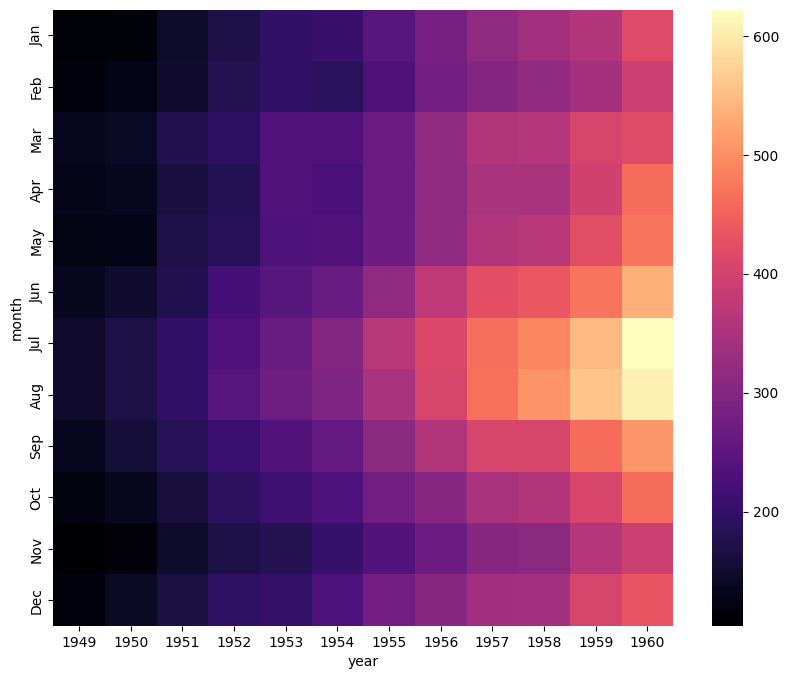

In [13]:
# Heatmap plot dari jumlah penerbangan, tahun dan bulan
piv_flights = flights.pivot_table(index='month', columns='year', values='passengers', aggfunc='sum')
plt.figure(figsize=(10,8 )) #mengatur size
sns.heatmap(piv_flights, cmap='magma') #mengatur tampilan heatmap
plt.show() #mengatur size


In [14]:
car_cr = sns.load_dataset('car_crashes')
car_cr.head(4)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR


In [15]:
car_cr.corr(numeric_only=True)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


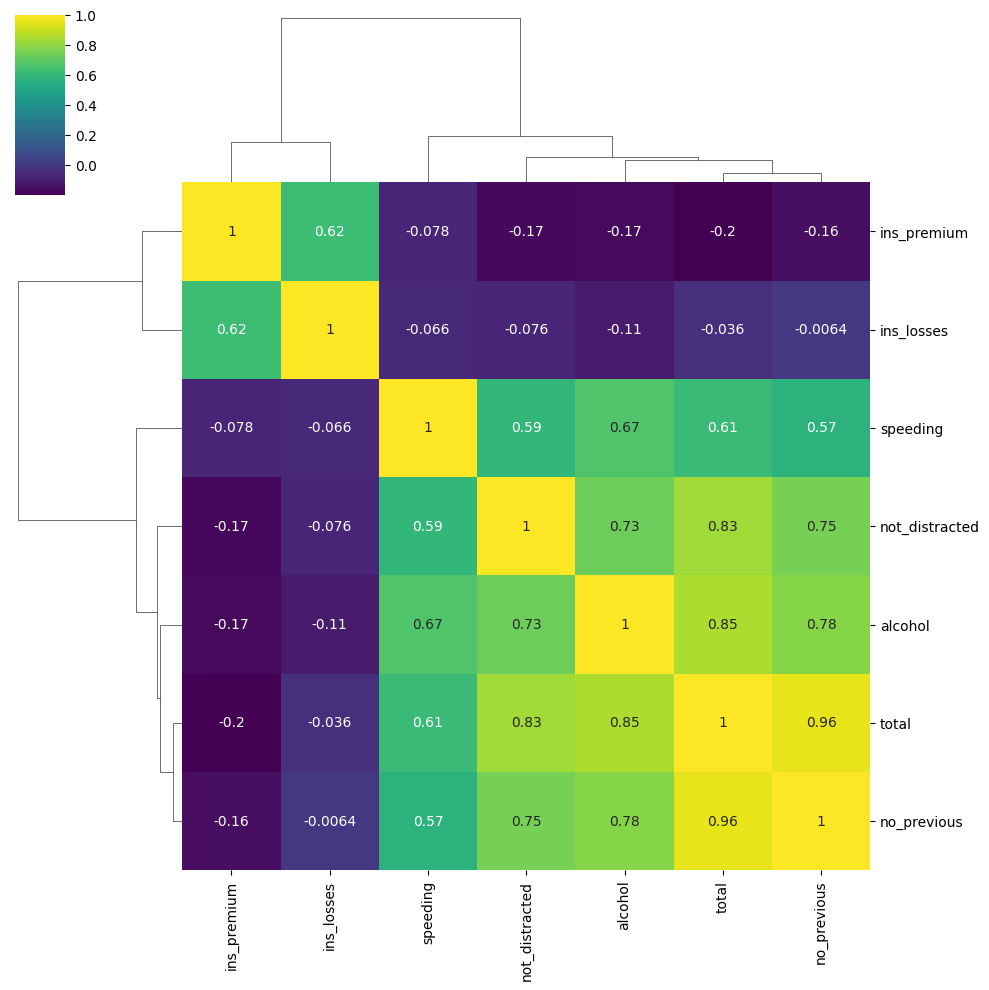

In [17]:
# Heatmap dari korelasi data kecelakaan mobil
korelasi_car = car_cr.corr(numeric_only=True)
sns.clustermap(korelasi_car, cmap='viridis', annot=True) #mengatur tampilan heatmap

Semakin gelap semakin tidak memiliki korelasi

<Axes: >

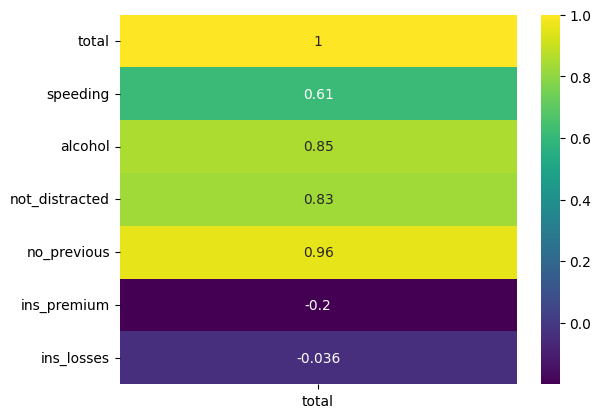

In [7]:
# Berdasarkan total kecelakaan
sns.heatmap(korelasi_car[['total']], annot=True, cmap='viridis')

Di dalam heatmap kita bisa menggunakan parameter cmap seperti palette

Paramter yang memiliki korelasi tinggi:
total dan no_previous
total dan alcohol
total dan not_distracted

#Clustermap

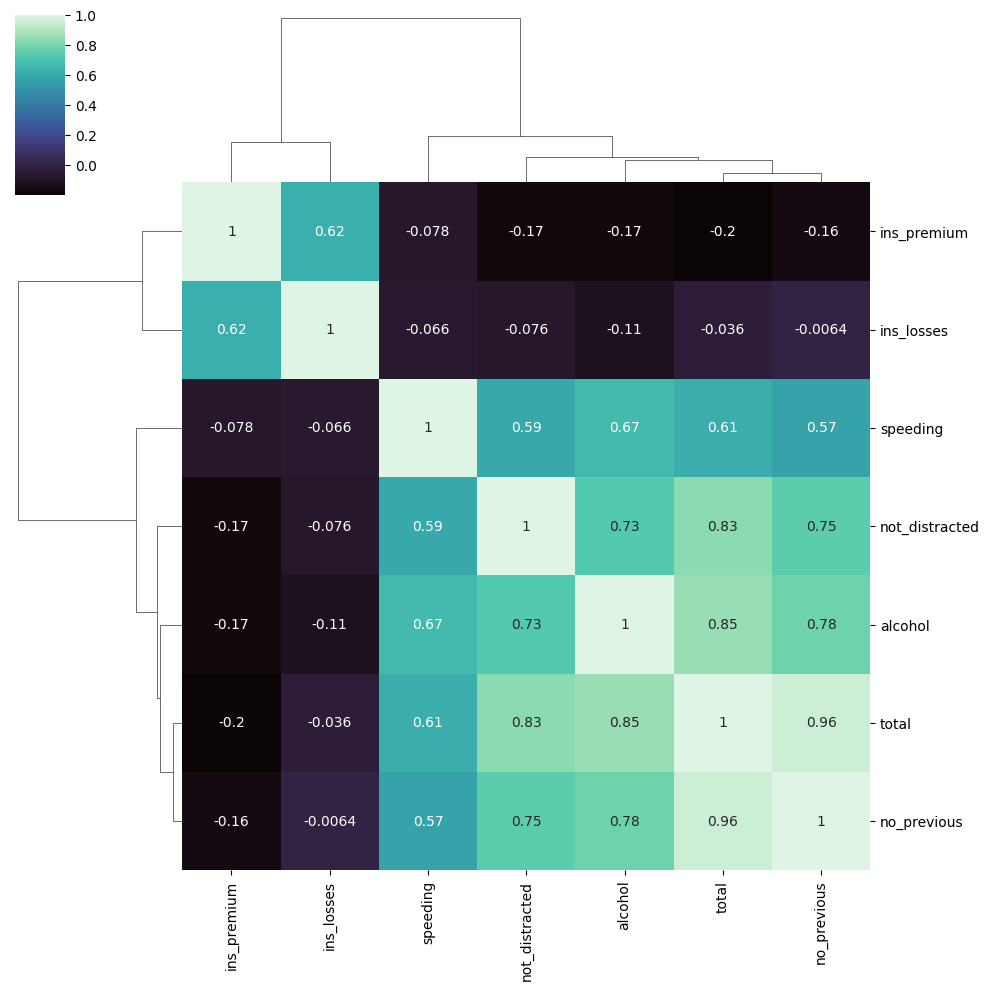

In [8]:
sns.clustermap(korelasi_car, annot=True, cmap='mako')